In [ ]:
!pip install boruta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 4.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from boruta import BorutaPy
import shap



In [ ]:

df = pd.read_csv('twitter_human_bots_dataset.csv')
df.head() # Display the first few rows of the dataframe to confirm

,Unnamed: 0,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,...,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type,profile_image_path,profile_background_image_path,split
0,0,2009-07-04 22:41:51,False,False,NaN,5007,102,168,False,53779179,...,https://pbs.twimg.com/profile_images/128969130...,paty_castroo,3974,False,0.978,4063,bot,NaN,NaN,0
1,1,2010-01-17 22:54:19,False,False,Television producer. Emmy Award winner. Disney...,1038,60,128,False,105916557,...,https://pbs.twimg.com/profile_images/632916759...,CBirckner,259,False,0.067,3866,human,profile_images/4691ae58668d932bb7e7af22141aecf...,profile_images/4691ae58668d932bb7e7af22141aecf...,0
2,2,2012-03-01 06:05:32,False,False,NaN,2257,599,449,True,509788597,...,https://pbs.twimg.com/profile_images/128853844...,amf_jay,13627,False,4.406,3093,human,NaN,NaN,0
3,3,2009-09-01 04:52:30,False,False,NaN,6407,116,334,True,70601327,...,https://pbs.twimg.com/profile_images/977012905...,SaraCavolo,4432,False,1.107,4005,human,profile_images/d1da9220e4aa376dff03b6f12765171...,profile_images/d1da9220e4aa376dff03b6f12765171...,0
4,4,2010-01-27 17:17:23,False,False,Productor de Televisión - Embajador de @Tienda...,20866,74448,18,True,108999927,...,https://pbs.twimg.com/profile_images/668449819...,DavidHenaoModel,15870,True,4.116,3856,human,profile_images/c65bf625b066ef5f29e14cfcf1ee91f...,profile_images/c65bf625b066ef5f29e14cfcf1ee91f...,0


In [ ]:
# prompt: print column names only

print(df.columns.tolist())

['Unnamed: 0', 'created_at', 'default_profile', 'default_profile_image', 'description', 'favourites_count', 'followers_count', 'friends_count', 'geo_enabled', 'id', 'lang', 'location', 'profile_background_image_url', 'profile_image_url', 'screen_name', 'statuses_count', 'verified', 'average_tweets_per_day', 'account_age_days', 'account_type', 'profile_image_path', 'profile_background_image_path', 'split']


In [ ]:
# prompt: print count of null values in each column

# Check for missing values in each column
print(df.isnull().sum())

Unnamed: 0                           0
created_at                           0
default_profile                      0
default_profile_image                0
description                       7257
favourites_count                     0
followers_count                      0
friends_count                        0
geo_enabled                          0
id                                   0
lang                              7957
location                             4
profile_background_image_url      4499
profile_image_url                    1
screen_name                          0
statuses_count                       0
verified                             0
average_tweets_per_day               0
account_age_days                     0
account_type                         0
profile_image_path               12938
profile_background_image_path    12938
split                                0
dtype: int64


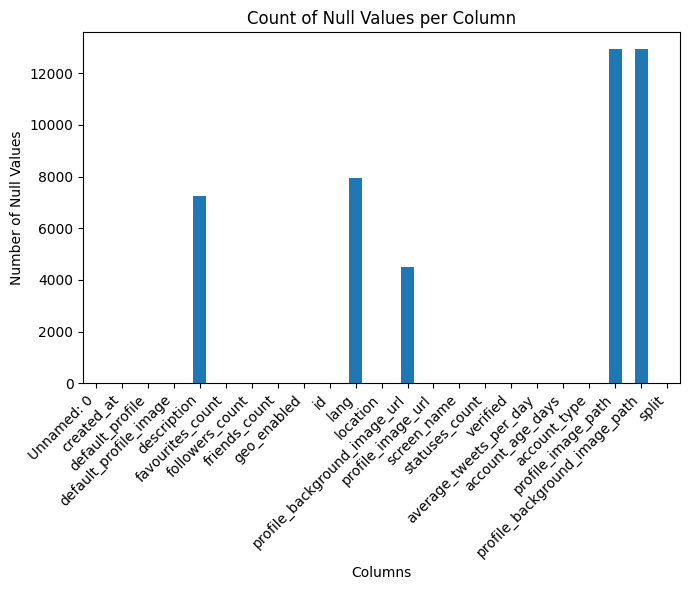

In [ ]:
# prompt: print bar chart showing count of null values in each column without Filtering out columns with no null values

import matplotlib.pyplot as plt
# Get the count of null values for each column
null_counts = df.isnull().sum()

# Create a bar chart including columns with zero nulls
plt.figure(figsize=(7, 6)) # Increase figure size for better readability
null_counts.plot(kind='bar')
plt.title('Count of Null Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# prompt: drop columns having null values

# Get the names of columns with any null values
columns_with_nulls = df.columns[df.isnull().any()].tolist()

# Drop columns with null values
df = df.drop(columns=columns_with_nulls)

# Verify that the columns have been dropped by checking for null values again
print(df.isnull().sum())

Unnamed: 0                0
created_at                0
default_profile           0
default_profile_image     0
favourites_count          0
followers_count           0
friends_count             0
geo_enabled               0
id                        0
screen_name               0
statuses_count            0
verified                  0
average_tweets_per_day    0
account_age_days          0
account_type              0
split                     0
dtype: int64


In [ ]:
df.head()

,Unnamed: 0,created_at,default_profile,default_profile_image,favourites_count,followers_count,friends_count,geo_enabled,id,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type,split
0,0,2009-07-04 22:41:51,False,False,5007,102,168,False,53779179,paty_castroo,3974,False,0.978,4063,bot,0
1,1,2010-01-17 22:54:19,False,False,1038,60,128,False,105916557,CBirckner,259,False,0.067,3866,human,0
2,2,2012-03-01 06:05:32,False,False,2257,599,449,True,509788597,amf_jay,13627,False,4.406,3093,human,0
3,3,2009-09-01 04:52:30,False,False,6407,116,334,True,70601327,SaraCavolo,4432,False,1.107,4005,human,0
4,4,2010-01-27 17:17:23,False,False,20866,74448,18,True,108999927,DavidHenaoModel,15870,True,4.116,3856,human,0


In [ ]:
# prompt: drop columns with name : Unnamed, geo_enabled, id, screen_name, split

# Columns to drop
columns_to_drop = ['Unnamed: 0', 'geo_enabled', 'id', 'screen_name', 'split']

# Drop the specified columns if they exist in the DataFrame
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Display the first few rows of the updated dataframe
df.head()

,created_at,default_profile,default_profile_image,favourites_count,followers_count,friends_count,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2009-07-04 22:41:51,False,False,5007,102,168,3974,False,0.978,4063,bot
1,2010-01-17 22:54:19,False,False,1038,60,128,259,False,0.067,3866,human
2,2012-03-01 06:05:32,False,False,2257,599,449,13627,False,4.406,3093,human
3,2009-09-01 04:52:30,False,False,6407,116,334,4432,False,1.107,4005,human
4,2010-01-27 17:17:23,False,False,20866,74448,18,15870,True,4.116,3856,human


In [ ]:
#convert a column containing date strings or numeric timestamps into datetime64 objects
df['created_at'] = pd.to_datetime(df['created_at'])
df.dtypes

,0
created_at,datetime64[ns]
default_profile,bool
default_profile_image,bool
favourites_count,int64
followers_count,int64
friends_count,int64
statuses_count,int64
verified,bool
average_tweets_per_day,float64
account_age_days,int64


In [ ]:
# 3. Feature Engineering
df['followers_friends_ratio'] = df['followers_count'] / (df['friends_count'] + 1)
df['favourites_statuses_ratio'] = df['favourites_count'] / (df['statuses_count'] + 1)
df['followers_per_day'] = df['followers_count'] / (df['account_age_days'] + 1)
df['statuses_per_day'] = df['statuses_count'] / (df['account_age_days'] + 1)
for col in ['followers_count', 'friends_count', 'statuses_count', 'favourites_count']:
    df[f'log_{col}'] = np.log1p(df[col])
for col in ['default_profile', 'default_profile_image', 'verified']:
    df[col] = df[col].astype(int)
df['account_age_years'] = df['account_age_days'] / 365
df['created_year'] = df['created_at'].dt.year

# 4. Feature Selection
feature_cols = [
    'default_profile', 'default_profile_image', 'favourites_count', 'followers_count', 'friends_count',
    'statuses_count', 'verified', 'average_tweets_per_day', 'account_age_days',
    'followers_friends_ratio', 'favourites_statuses_ratio',
    'followers_per_day', 'statuses_per_day',
    'log_followers_count', 'log_friends_count', 'log_statuses_count', 'log_favourites_count',
    'account_age_years', 'created_year'
]

In [ ]:
df.head()

,created_at,default_profile,default_profile_image,favourites_count,followers_count,friends_count,statuses_count,verified,average_tweets_per_day,account_age_days,...,followers_friends_ratio,favourites_statuses_ratio,followers_per_day,statuses_per_day,log_followers_count,log_friends_count,log_statuses_count,log_favourites_count,account_age_years,created_year
0,2009-07-04 22:41:51,0,0,5007,102,168,3974,0,0.978,4063,...,0.603550,1.259623,0.025098,0.977854,4.634729,5.129899,8.287780,8.518792,11.131507,2009
1,2010-01-17 22:54:19,0,0,1038,60,128,259,0,0.067,3866,...,0.465116,3.992308,0.015516,0.066977,4.110874,4.859812,5.560682,6.946014,10.591781,2010
2,2012-03-01 06:05:32,0,0,2257,599,449,13627,0,4.406,3093,...,1.331111,0.165615,0.193601,4.404331,6.396930,6.109248,9.519882,7.722235,8.473973,2012
3,2009-09-01 04:52:30,0,0,6407,116,334,4432,0,1.107,4005,...,0.346269,1.445297,0.028957,1.106340,4.762174,5.814131,8.396832,8.765302,10.972603,2009
4,2010-01-27 17:17:23,0,0,20866,74448,18,15870,1,4.116,3856,...,3918.315789,1.314725,19.302048,4.114597,11.217870,2.944439,9.672249,9.945924,10.564384,2010


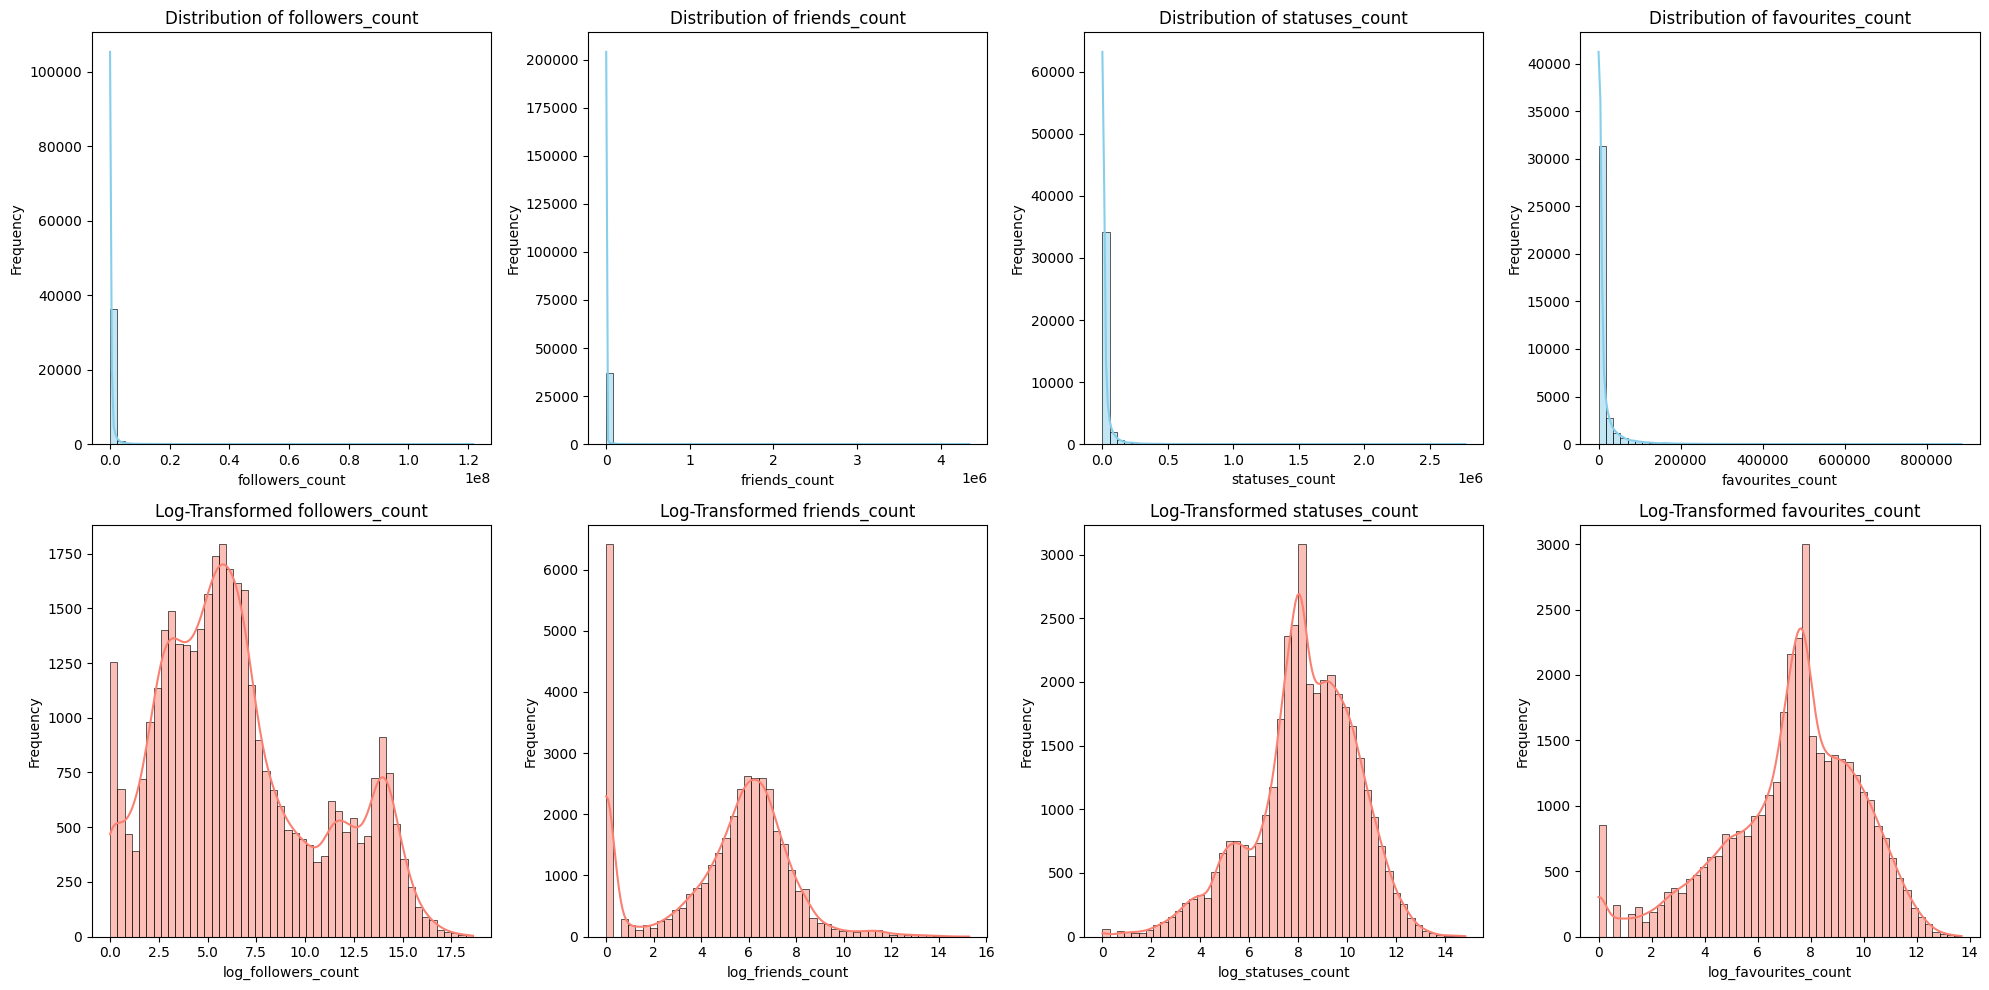

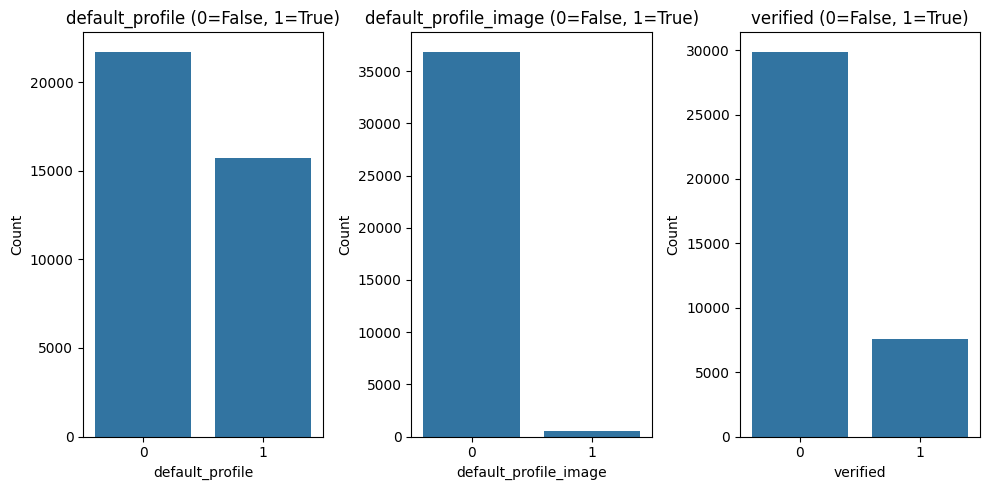

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Visualize the distribution of original vs. log-transformed features
count_cols = ['followers_count', 'friends_count', 'statuses_count', 'favourites_count']
log_cols = [f'log_{col}' for col in count_cols]

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for i, col in enumerate(count_cols):
    sns.histplot(df[col], bins=50, ax=axs[0, i], color='skyblue', kde=True)
    axs[0, i].set_title(f'Distribution of {col}')
    axs[0, i].set_xlabel(col)
    axs[0, i].set_ylabel('Frequency')
    sns.histplot(df[f'log_{col}'], bins=50, ax=axs[1, i], color='salmon', kde=True)
    axs[1, i].set_title(f'Log-Transformed {col}')
    axs[1, i].set_xlabel(f'log_{col}')
    axs[1, i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# Bar plot for integer conversion of boolean columns
bool_cols = ['default_profile', 'default_profile_image', 'verified']
plt.figure(figsize=(10, 5))
for i, col in enumerate(bool_cols):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=df[col])
    plt.title(f'{col} (0=False, 1=True)')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
# prompt: print unique values in account_type
dff = pd.read_csv('twitter_human_bots_dataset.csv')
print(dff['account_type'].unique())


['bot' 'human']


In [ ]:
# Replace 'bot' with 1 and 'human' with 0
dff['account_type'] = dff['account_type'].replace({'bot': 1, 'human': 0})

# Confirm the changes
print(dff['account_type'].value_counts())

dff['account_type'] = dff['account_type'].astype(int)

account_type
0    25013
1    12425
Name: count, dtype: int64


/tmp/ipython-input-15-3126435140.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dff['account_type'] = dff['account_type'].replace({'bot': 1, 'human': 0})


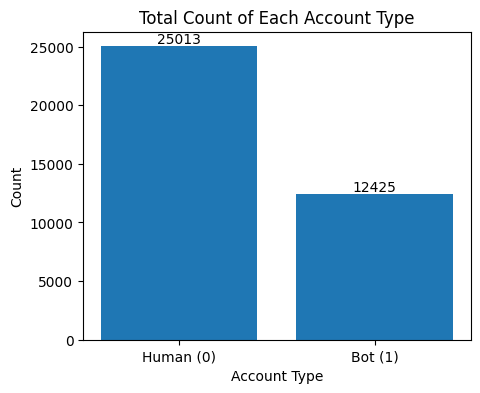

In [ ]:
# prompt: print bar chart of column account_type with total count of each unique value in chart itself

import matplotlib.pyplot as plt
# Get the counts of each unique value in the 'account_type' column
account_type_counts = dff['account_type'].value_counts()

# Create the bar chart
plt.figure(figsize=(5, 4))
bars = plt.bar(account_type_counts.index, account_type_counts.values)

# Add the total count on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom') # Add count on top of each bar

plt.title('Total Count of Each Account Type')
plt.xlabel('Account Type')
plt.ylabel('Count')
plt.xticks(account_type_counts.index, ['Human (0)', 'Bot (1)']) # Label the x-axis ticks
plt.show()


In [ ]:
y = df['account_type'].map({'bot': 1, 'human': 0})      # Replace 'target' with your target column name
X = df[feature_cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/tmp/ipython-input-20-1697375432.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_rf[sorted_idx_rf[:top_n]], y=X.columns[sorted_idx_rf[:top_n]], palette="crest")


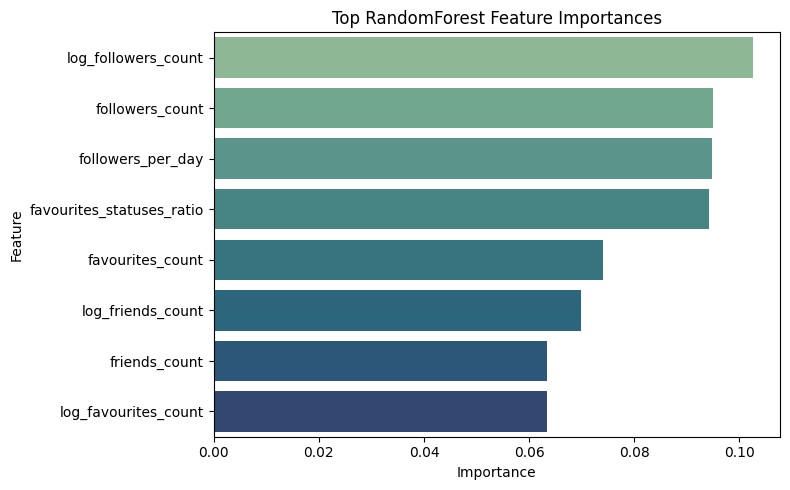

Top features from RandomForest: ['log_followers_count', 'followers_count', 'followers_per_day', 'favourites_statuses_ratio', 'favourites_count', 'log_friends_count', 'friends_count', 'log_favourites_count']


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:56:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/tmp/ipython-input-20-1697375432.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_xgb[sorted_idx_xgb[:top_n]], y=X.columns[sorted_idx_xgb[:top_n]], palette="flare")


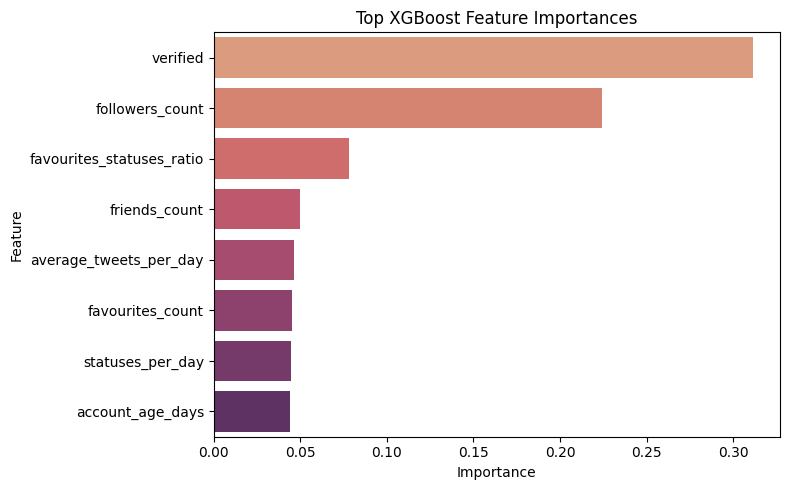

Top features from XGBoost: ['verified', 'followers_count', 'favourites_statuses_ratio', 'friends_count', 'average_tweets_per_day', 'favourites_count', 'statuses_per_day', 'account_age_days']


/tmp/ipython-input-20-1697375432.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ranking, y=X.columns, palette="mako")


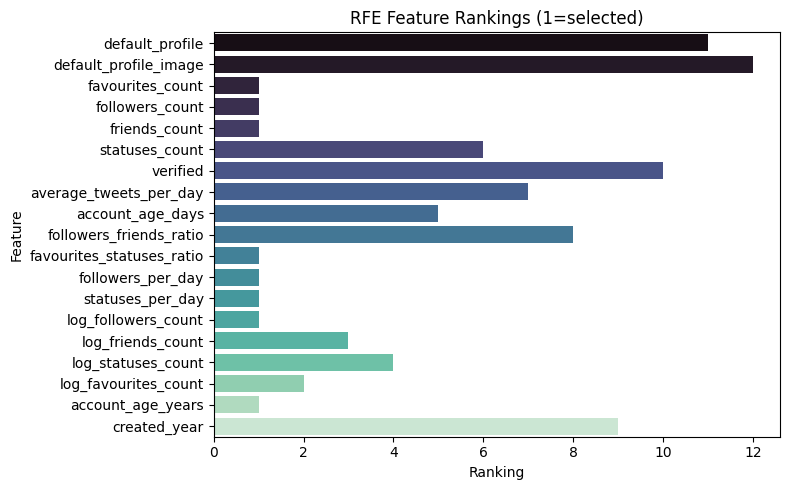

Top features from RFE: ['favourites_count', 'followers_count', 'friends_count', 'favourites_statuses_ratio', 'followers_per_day', 'statuses_per_day', 'log_followers_count', 'account_age_years']


In [ ]:
#Tree Based feature selection

top_n = 8  # Number of top features to select

# 1. RandomForest Feature Importances & Visualization
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
importances_rf = rf.feature_importances_
sorted_idx_rf = importances_rf.argsort()[::-1]
top_features_rf = X.columns[sorted_idx_rf[:top_n]]

plt.figure(figsize=(8, 5))
sns.barplot(x=importances_rf[sorted_idx_rf[:top_n]], y=X.columns[sorted_idx_rf[:top_n]], palette="crest")
plt.title('Top RandomForest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("Top features from RandomForest:", list(top_features_rf))

# 2. XGBoost Feature Importances & Visualization
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X, y)
importances_xgb = xgb.feature_importances_
sorted_idx_xgb = importances_xgb.argsort()[::-1]
top_features_xgb = X.columns[sorted_idx_xgb[:top_n]]

plt.figure(figsize=(8, 5))
sns.barplot(x=importances_xgb[sorted_idx_xgb[:top_n]], y=X.columns[sorted_idx_xgb[:top_n]], palette="flare")
plt.title('Top XGBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("Top features from XGBoost:", list(top_features_xgb))

# 3. RFE (Recursive Feature Elimination) with RandomForest & Visualization
rfe = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=top_n)
rfe.fit(X, y)
ranking = rfe.ranking_
selected_features_rfe = X.columns[rfe.get_support()]

# Barplot: Lower rank is better (1 means selected)
plt.figure(figsize=(8, 5))
sns.barplot(x=ranking, y=X.columns, palette="mako")
plt.title("RFE Feature Rankings (1=selected)")
plt.xlabel("Ranking")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

print("Top features from RFE:", list(selected_features_rfe))

In [ ]:
# 1. Tree-based Feature Importances (RandomForest)
from sklearn.ensemble import RandomForestClassifier

# Prepare data (edit feature_cols and target as needed)
X = df[feature_cols]
y = df['account_type'].map({'bot': 1, 'human': 0}) # replace 'target' with your target column name

# Fit RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get importances
importances = rf.feature_importances_
sorted_idx = importances.argsort()[::-1]
print("RandomForest Feature Importances:")
for i in sorted_idx:
    print(f"{X.columns[i]}: {importances[i]:.4f}")

# Select top N features (here, top 8)
top_n = 8
top_features_rf = X.columns[sorted_idx[:top_n]].tolist()
print("Top features from RandomForest:", top_features_rf)

# 2. Tree-based Feature Importances (XGBoost)
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X, y)
importances_xgb = xgb.feature_importances_
sorted_idx_xgb = importances_xgb.argsort()[::-1]
print("XGBoost Feature Importances:")
for i in sorted_idx_xgb:
    print(f"{X.columns[i]}: {importances_xgb[i]:.4f}")

top_features_xgb = X.columns[sorted_idx_xgb[:top_n]].tolist()
print("Top features from XGBoost:", top_features_xgb)

# 3. Recursive Feature Elimination (RFE) with RandomForest
from sklearn.feature_selection import RFE

estimator = RandomForestClassifier(n_estimators=100, random_state=42)
selector = RFE(estimator, n_features_to_select=top_n)
selector.fit(X, y)
rfe_features = X.columns[selector.get_support()].tolist()
print("Top features from RFE:", rfe_features)

RandomForest Feature Importances:
log_followers_count: 0.1026
followers_count: 0.0950
followers_per_day: 0.0947
favourites_statuses_ratio: 0.0942
favourites_count: 0.0741
log_friends_count: 0.0699
friends_count: 0.0635
log_favourites_count: 0.0633
log_statuses_count: 0.0466
account_age_years: 0.0465
account_age_days: 0.0456
statuses_per_day: 0.0423
statuses_count: 0.0419
average_tweets_per_day: 0.0398
followers_friends_ratio: 0.0396
created_year: 0.0167
verified: 0.0157
default_profile: 0.0068
default_profile_image: 0.0011
Top features from RandomForest: ['log_followers_count', 'followers_count', 'followers_per_day', 'favourites_statuses_ratio', 'favourites_count', 'log_friends_count', 'friends_count', 'log_favourites_count']


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:51:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Feature Importances:
verified: 0.3115
followers_count: 0.2243
favourites_statuses_ratio: 0.0780
friends_count: 0.0500
average_tweets_per_day: 0.0464
favourites_count: 0.0450
statuses_per_day: 0.0448
account_age_days: 0.0442
followers_per_day: 0.0348
default_profile: 0.0274
created_year: 0.0250
followers_friends_ratio: 0.0248
statuses_count: 0.0240
default_profile_image: 0.0199
account_age_years: 0.0000
log_favourites_count: 0.0000
log_friends_count: 0.0000
log_followers_count: 0.0000
log_statuses_count: 0.0000
Top features from XGBoost: ['verified', 'followers_count', 'favourites_statuses_ratio', 'friends_count', 'average_tweets_per_day', 'favourites_count', 'statuses_per_day', 'account_age_days']
Top features from RFE: ['favourites_count', 'followers_count', 'friends_count', 'favourites_statuses_ratio', 'followers_per_day', 'statuses_per_day', 'log_followers_count', 'account_age_years']


Accuracy Score: 0.8794070512820513
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      5003
           1       0.86      0.76      0.81      2485

    accuracy                           0.88      7488
   macro avg       0.87      0.85      0.86      7488
weighted avg       0.88      0.88      0.88      7488

Confusion Matrix:
 [[4698  305]
 [ 598 1887]]
ROC-AUC Score: 0.9323171489460449


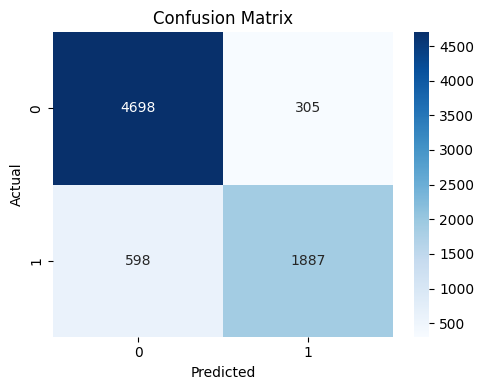

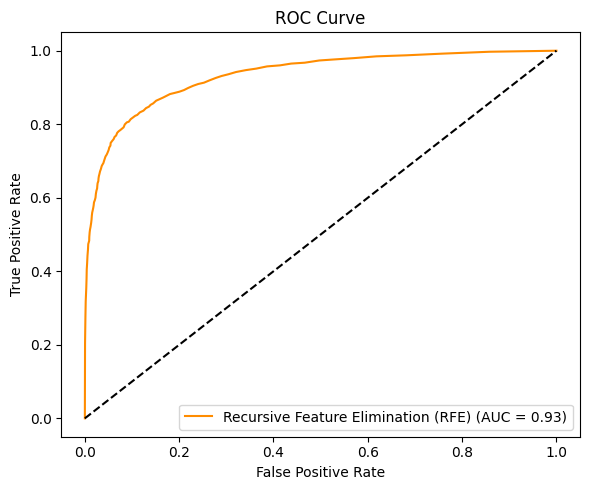

In [ ]:
# Example: Use top features from RandomForest
#X_selected = X[top_features_rf]

# Or, use top features from XGBoost
# X_selected = X[top_features_xgb]

#  use top features from RFE
X_selected = X[selected_features_rfe]



from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# Print accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()



from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Recursive Feature Elimination (RFE) (AUC = {roc_auc_score(y_test, y_proba):.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)

# Prepare data (set your feature columns and target)
# df = pd.read_csv('your_data.csv')
# feature_cols = [...]
# X = df[feature_cols]
# y = df['account_type'].map({'bot': 1, 'human': 0})  # Adjust if needed

top_n = 8  # Number of top features to select

# 1. Random Forest Feature Importances & Visualization
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
importances_rf = rf.feature_importances_
sorted_idx_rf = importances_rf.argsort()[::-1]
top_features_rf = X.columns[sorted_idx_rf[:top_n]]

plt.figure(figsize=(8, 5))
sns.barplot(x=importances_rf[sorted_idx_rf[:top_n]], y=top_features_rf, palette="crest")
plt.title('Top RandomForest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
print("Top features from RandomForest:", list(top_features_rf))

# 2. XGBoost Feature Importances & Visualization
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X, y)
importances_xgb = xgb.feature_importances_
sorted_idx_xgb = importances_xgb.argsort()[::-1]
top_features_xgb = X.columns[sorted_idx_xgb[:top_n]]

plt.figure(figsize=(8, 5))
sns.barplot(x=importances_xgb[sorted_idx_xgb[:top_n]], y=top_features_xgb, palette="flare")
plt.title('Top XGBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
print("Top features from XGBoost:", list(top_features_xgb))

# 3. RFE (Recursive Feature Elimination) with Random Forest & Visualization
rfe = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=top_n)
rfe.fit(X, y)
ranking = rfe.ranking_
selected_features_rfe = X.columns[rfe.get_support()]
print("Top features from RFE:", list(selected_features_rfe))

# Visualize RFE Rankings
plt.figure(figsize=(8, 5))
sns.barplot(x=ranking, y=X.columns, palette="mako")
plt.title("RFE Feature Rankings (1=selected)")
plt.xlabel("Ranking")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# ---- Model Training/Evaluation using RFE-selected features ----

X_selected = X[selected_features_rfe]

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# ROC Curve Visualization
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'RFE (AUC = {roc_auc_score(y_test, y_proba):.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-24-2839221385.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_rf[sorted_idx_rf[:top_n]], y=top_features_rf, palette="crest")


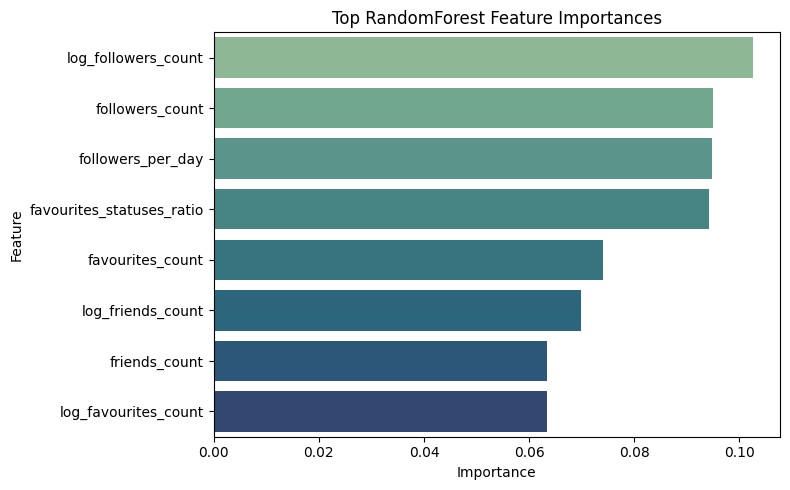

Top features from RandomForest: ['log_followers_count', 'followers_count', 'followers_per_day', 'favourites_statuses_ratio', 'favourites_count', 'log_friends_count', 'friends_count', 'log_favourites_count']


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:10:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/tmp/ipython-input-24-2839221385.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_xgb[sorted_idx_xgb[:top_n]], y=top_features_xgb, palette="flare")


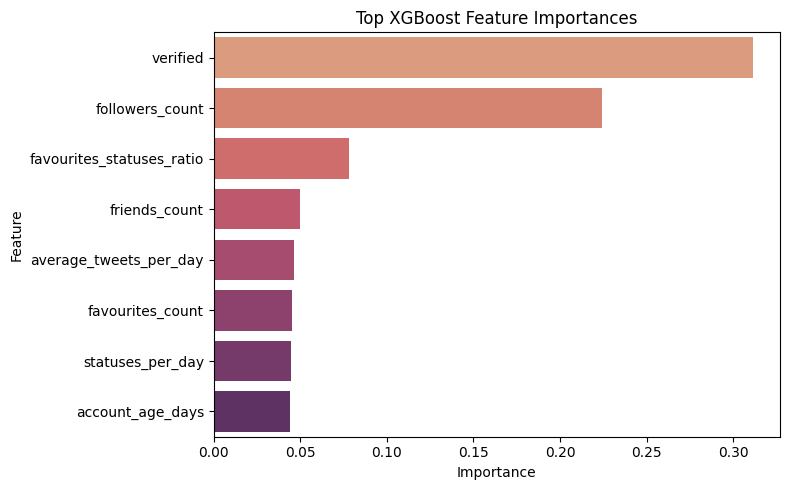

Top features from XGBoost: ['verified', 'followers_count', 'favourites_statuses_ratio', 'friends_count', 'average_tweets_per_day', 'favourites_count', 'statuses_per_day', 'account_age_days']


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)

# Prepare data (set your feature columns and target)
# df = pd.read_csv('your_data.csv')
# feature_cols = [...]
# X = df[feature_cols]
# y = df['account_type'].map({'bot': 1, 'human': 0})  # Adjust if needed

top_n = 8  # Number of top features to select

# 1. Random Forest Feature Importances & Visualization
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
importances_rf = rf.feature_importances_
sorted_idx_rf = importances_rf.argsort()[::-1]
top_features_rf = X.columns[sorted_idx_rf[:top_n]]

plt.figure(figsize=(8, 5))
sns.barplot(x=importances_rf[sorted_idx_rf[:top_n]], y=top_features_rf, palette="crest")
plt.title('Top RandomForest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
print("Top features from RandomForest:", list(top_features_rf))

# 2. XGBoost Feature Importances & Visualization
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X, y)
importances_xgb = xgb.feature_importances_
sorted_idx_xgb = importances_xgb.argsort()[::-1]
top_features_xgb = X.columns[sorted_idx_xgb[:top_n]]

plt.figure(figsize=(8, 5))
sns.barplot(x=importances_xgb[sorted_idx_xgb[:top_n]], y=top_features_xgb, palette="flare")
plt.title('Top XGBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
print("Top features from XGBoost:", list(top_features_xgb))

# 3. RFE (Recursive Feature Elimination) with Random Forest & Visualization
rfe = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=top_n)
rfe.fit(X, y)
ranking = rfe.ranking_
selected_features_rfe = X.columns[rfe.get_support()]
print("Top features from RFE:", list(selected_features_rfe))

# Visualize RFE Rankings
plt.figure(figsize=(8, 5))
sns.barplot(x=ranking, y=X.columns, palette="mako")
plt.title("RFE Feature Rankings (1=selected)")
plt.xlabel("Ranking")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# ---- Model Training/Evaluation using RFE-selected features ----

X_selected = X[selected_features_rfe]

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# ROC Curve Visualization
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'RFE (AUC = {roc_auc_score(y_test, y_proba):.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
X = df[feature_cols]
y = df['account_type'].map({'bot': 1, 'human': 0})
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Boruta Feature Selection (using RandomForest)
rf_boruta = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')
boruta_selector = BorutaPy(rf_boruta, n_estimators='auto', random_state=42)
boruta_selector.fit(X_scaled, y)
# Get Boruta-selected features
selected_features = X.columns[boruta_selector.support_].tolist()
print("Boruta selected features:", selected_features)

#Fit a RandomForest on these features to rank their importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(df[selected_features], y)
importances = rf.feature_importances_

# Sort features by importance and pick the top 8
#indices = np.argsort(importances)[::-1]  # descending order
#top_8_features = [selected_features[i] for i in indices[:8]]

#print("Top 8 features after Boruta and importance ranking:", top_8_features)


# For further steps, use selected features only
X_selected = df[selected_features]
X_selected_scaled = scaler.fit_transform(X_selected)



Boruta selected features: ['favourites_count', 'followers_count', 'friends_count', 'statuses_count', 'verified', 'average_tweets_per_day', 'account_age_days', 'followers_friends_ratio', 'favourites_statuses_ratio', 'followers_per_day', 'statuses_per_day', 'log_followers_count', 'log_friends_count', 'log_statuses_count', 'log_favourites_count', 'account_age_years', 'created_year']


/tmp/ipython-input-31-579667447.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feat_imp_df, palette='viridis')


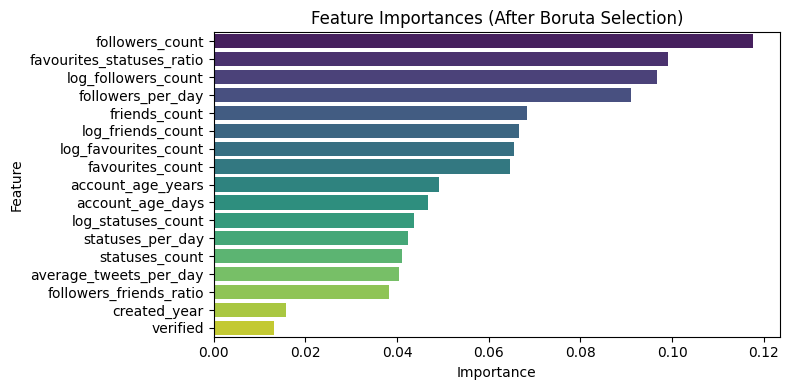

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# X_selected: your DataFrame with only selected features
# y: your target variable

# Refit a RandomForest on selected features
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_selected, y)

importances = rf.feature_importances_
feature_names = X_selected.columns

feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x='importance', y='feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importances (After Boruta Selection)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [ ]:
# 5. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_selected_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 6. Model Selection: Classical ML
models = {
    'DecisionTree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=200, random_state=42)
}


In [ ]:

# 7. Training, Cross-Validation, and Evaluation
best_model = None
best_auc = 0
results = {}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)  # <-- added line
    results[name] = {
        'AUC': auc, 'F1': f1, 'Precision': precision, 'Recall': recall, 'Accuracy': accuracy
    }
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy)  # <-- added line
    print("ROC-AUC:", auc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    if auc > best_auc:
        best_auc = auc
        best_model = model

--- DecisionTree ---
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      5003
           1       0.73      0.75      0.74      2485

    accuracy                           0.83      7488
   macro avg       0.80      0.81      0.80      7488
weighted avg       0.83      0.83      0.83      7488

ROC-AUC: 0.8053814793618799
Confusion Matrix:
 [[4322  681]
 [ 629 1856]]
--- RandomForest ---
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      5003
           1       0.86      0.76      0.81      2485

    accuracy                           0.88      7488
   macro avg       0.88      0.85      0.86      7488
weighted avg       0.88      0.88      0.88      7488

ROC-AUC: 0.9351976741520481
Confusion Matrix:
 [[4702  301]
 [ 590 1895]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:55:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- XGBoost ---
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5003
           1       0.85      0.76      0.81      2485

    accuracy                           0.88      7488
   macro avg       0.87      0.85      0.86      7488
weighted avg       0.88      0.88      0.88      7488

ROC-AUC: 0.9335292184850056
Confusion Matrix:
 [[4676  327]
 [ 588 1897]]
--- AdaBoost ---
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      5003
           1       0.79      0.71      0.75      2485

    accuracy                           0.84      7488
   macro avg       0.83      0.81      0.82      7488
weighted avg       0.84      0.84      0.84      7488

ROC-AUC: 0.8982972791777649
Confusion Matrix:
 [[4551  452]
 [ 733 1752]]


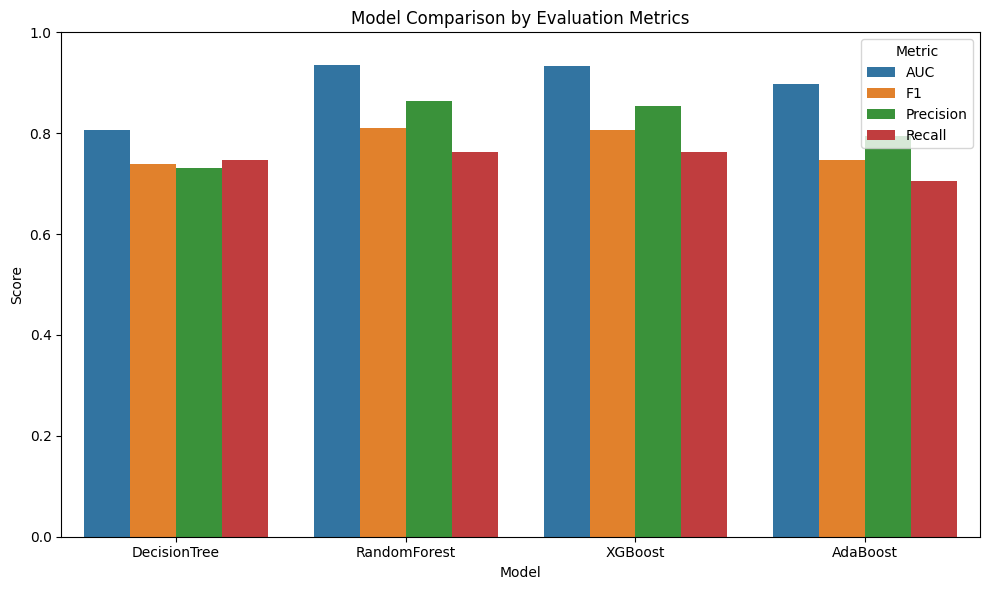

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})

# Melt for easier plotting
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric')
plt.ylim(0, 1)
plt.title('Model Comparison by Evaluation Metrics')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

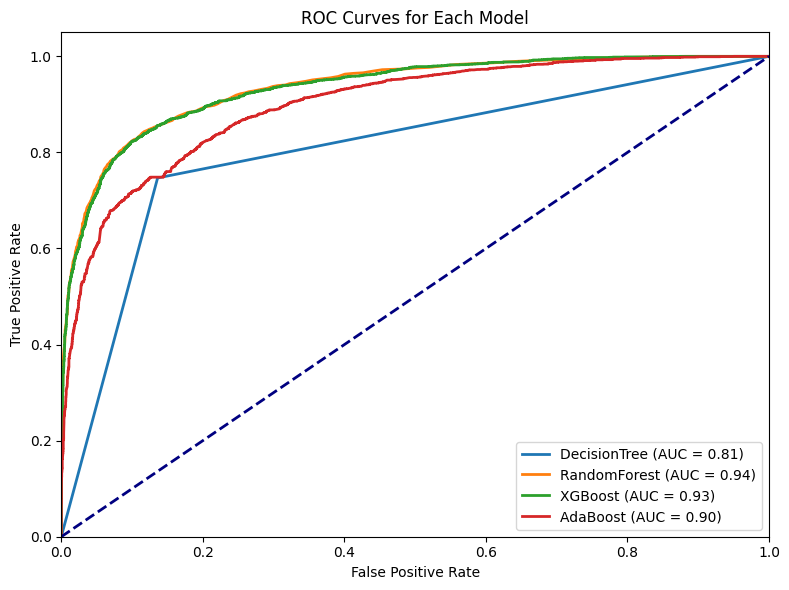

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for name, model in models.items():
    # Predict probabilities for the positive class
    y_proba = model.predict_proba(X_test)[:, 1]
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal for random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Model')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

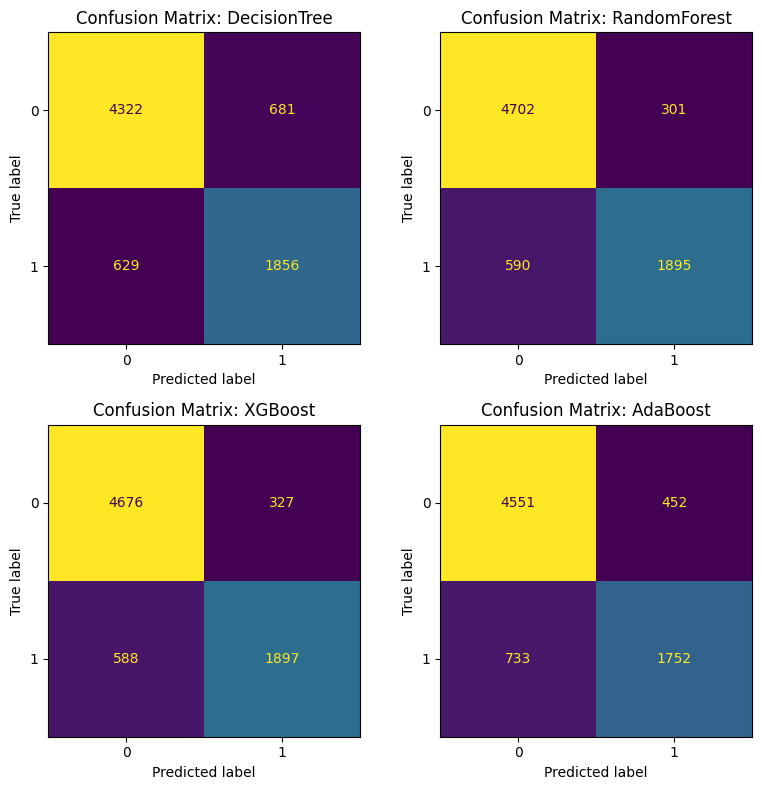

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

n_models = len(models)
n_cols = 2
n_rows = (n_models + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 4 * n_rows))

for ax, (name, model) in zip(axes.flat, models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, colorbar=False)
    ax.set_title(f'Confusion Matrix: {name}')

# Hide empty subplots if any
for i in range(n_models, n_rows * n_cols):
    fig.delaxes(axes.flat[i])

plt.tight_layout()
plt.show()

In [ ]:
#SHAP

# 2. Train initial model
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 3. Calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# 4. Visualize SHAP summary plot (global feature importance)
plt.figure()
shap.summary_plot(shap_values, X_train, plot_type="bar", show=False)
plt.title("Feature Importance (SHAP values)")
plt.tight_layout()
plt.savefig("shap_feature_importance_bar.png")
plt.show()

# 5. Select features above a SHAP importance threshold
mean_abs_shap = np.abs(shap_values[1] if isinstance(shap_values, list) else shap_values).mean(axis=0)
feature_importance = pd.Series(mean_abs_shap, index=X_train.columns).sort_values(ascending=False)
threshold = feature_importance.mean()  # You can adjust this threshold

selected_features = feature_importance[feature_importance > threshold].index.tolist()
print("Selected features:", selected_features)

# 6. Retrain model using selected features
X_train_reduced = X_train[selected_features]
X_test_reduced = X_test[selected_features]

model_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
model_reduced.fit(X_train_reduced, y_train)
y_pred = model_reduced.predict(X_test_reduced)

# 7. Evaluate the new model
print("Classification report after feature selection:")
print(classification_report(y_test, y_pred))

# 8. Visualize comparison
fig, ax = plt.subplots(figsize=(8, 4))
orig_importance = feature_importance
reduced_importance = orig_importance.loc[selected_features]
ax.bar(orig_importance.index, orig_importance.values, color='skyblue', label='Original')
ax.bar(reduced_importance.index, reduced_importance.values, color='orange', label='Selected')
plt.xticks(rotation=90)
plt.ylabel('Mean |SHAP value|')
plt.title('Feature Importance Before and After Selection')
plt.legend()
plt.tight_layout()
plt.savefig("feature_importance_comparison.png")
plt.show()

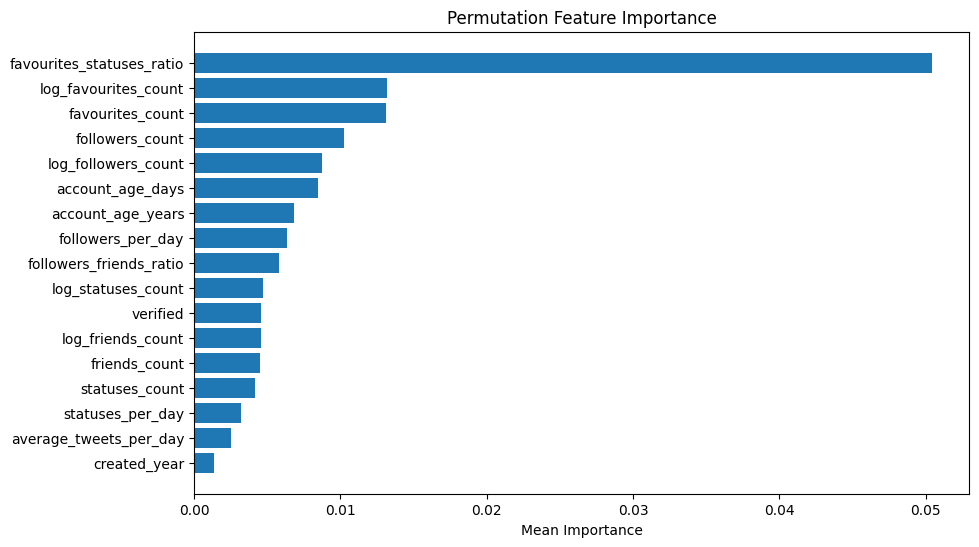

In [ ]:

# 8. Permutation Importance & SHAP for Best Model
perm_result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx = perm_result.importances_mean.argsort()[::-1]
plt.figure(figsize=(10, 6))
plt.barh(np.array(selected_features)[sorted_idx], perm_result.importances_mean[sorted_idx])
plt.xlabel("Mean Importance")
plt.title("Permutation Feature Importance")
plt.gca().invert_yaxis()
plt.show()

shap.initjs()
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=selected_features)


In [ ]:

# 9. Ensemble: Stacking Classifier
estimators = [
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=200, random_state=42))
]
stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier(n_estimators=50, random_state=42),
    cv=5, n_jobs=-1
)
stacking.fit(X_train, y_train)
y_pred_stack = stacking.predict(X_test)
y_proba_stack = stacking.predict_proba(X_test)[:, 1]

print("--- Stacking Ensemble ---")
print(classification_report(y_test, y_pred_stack))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_stack))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))
print("Stacking Results: F1=%.3f, Precision=%.3f, Recall=%.3f" % (
    f1_score(y_test, y_pred_stack), precision_score(y_test, y_pred_stack), recall_score(y_test, y_pred_stack)
))
print("Accuracy:", accuracy_score(y_test, y_pred_stack))


--- Stacking Ensemble ---
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      5003
           1       0.84      0.75      0.80      2485

    accuracy                           0.87      7488
   macro avg       0.86      0.84      0.85      7488
weighted avg       0.87      0.87      0.87      7488

ROC-AUC: 0.9223915147893156
Confusion Matrix:
 [[4653  350]
 [ 609 1876]]
Stacking Results: F1=0.796, Precision=0.843, Recall=0.755
Accuracy: 0.8719284188034188


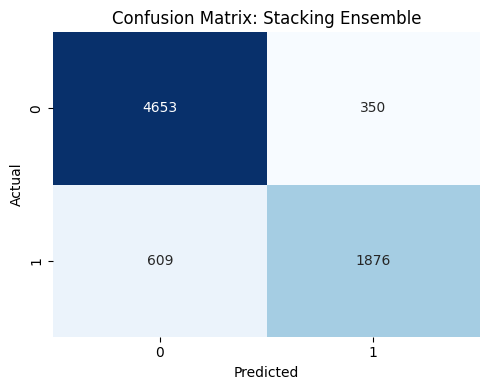

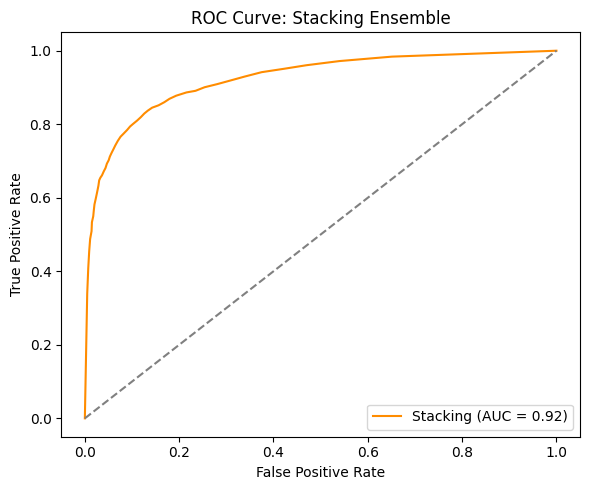

<ipython-input-25-4195389720>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')


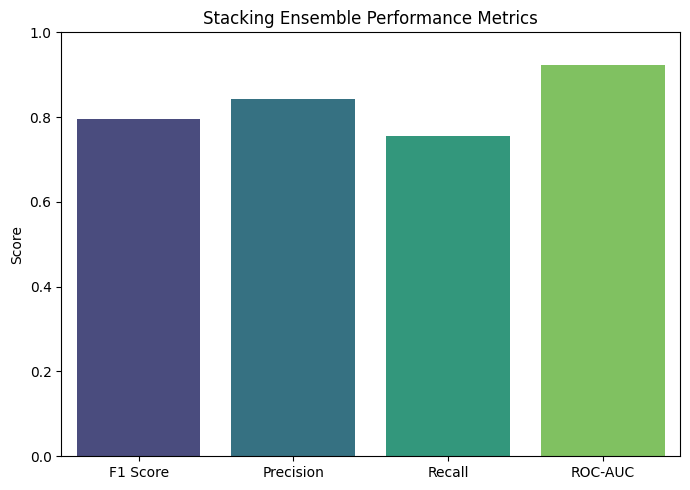

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    confusion_matrix, roc_curve, auc, classification_report,
    f1_score, precision_score, recall_score, roc_auc_score
)

# --- After fitting your stacking classifier and getting predictions as you have done above ---

# 1. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred_stack)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: Stacking Ensemble')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_stack)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Stacking (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Stacking Ensemble')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# 3. Bar Plot for Metrics
metrics = {
    'F1 Score': f1_score(y_test, y_pred_stack),
    'Precision': precision_score(y_test, y_pred_stack),
    'Recall': recall_score(y_test, y_pred_stack),
    'ROC-AUC': roc_auc_score(y_test, y_proba_stack)
}
plt.figure(figsize=(7, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.ylim(0, 1)
plt.title('Stacking Ensemble Performance Metrics')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

In [ ]:
# Summary of Results
print("Summary Results:")
for name, metrics in results.items():
    print(f"{name}: {metrics}")
print("Stacking Ensemble:", {
    'AUC': roc_auc_score(y_test, y_proba_stack),
    'F1': f1_score(y_test, y_pred_stack),
    'Precision': precision_score(y_test, y_pred_stack),
    'Recall': recall_score(y_test, y_pred_stack)
})

Summary Results:
DecisionTree: {'AUC': np.float64(0.8053814793618799), 'F1': 0.7391477499004381, 'Precision': 0.731572723689397, 'Recall': 0.7468812877263582}
RandomForest: {'AUC': np.float64(0.9351976741520481), 'F1': 0.8096560563982055, 'Precision': 0.8629326047358834, 'Recall': 0.7625754527162978}
XGBoost: {'AUC': np.float64(0.9335292184850056), 'F1': 0.8056912295604163, 'Precision': 0.8529676258992805, 'Recall': 0.7633802816901408}
AdaBoost: {'AUC': np.float64(0.8982972791777649), 'F1': 0.7472808701215611, 'Precision': 0.79491833030853, 'Recall': 0.7050301810865192}
Stacking Ensemble: {'AUC': np.float64(0.9223915147893156), 'F1': 0.7964338781575037, 'Precision': 0.8427672955974843, 'Recall': 0.7549295774647887}


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Oversample bots in training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Train model with higher class weight
rf = RandomForestClassifier(
    n_estimators=300,
    class_weight={0:1, 1:3},
    random_state=42
)
rf.fit(X_train_bal, y_train_bal)

# Evaluate on test set
y_proba = rf.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.4).astype(int)  # Lowered threshold for higher recall

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      5003
           1       0.76      0.85      0.80      2485

    accuracy                           0.86      7488
   macro avg       0.84      0.86      0.85      7488
weighted avg       0.87      0.86      0.86      7488



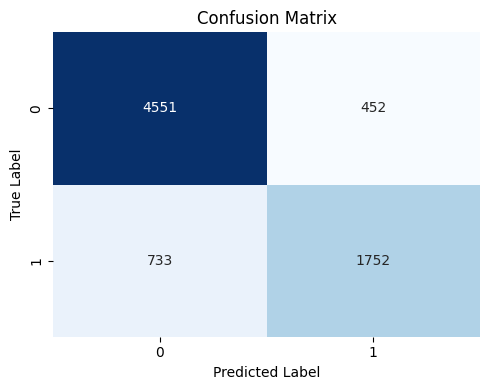

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

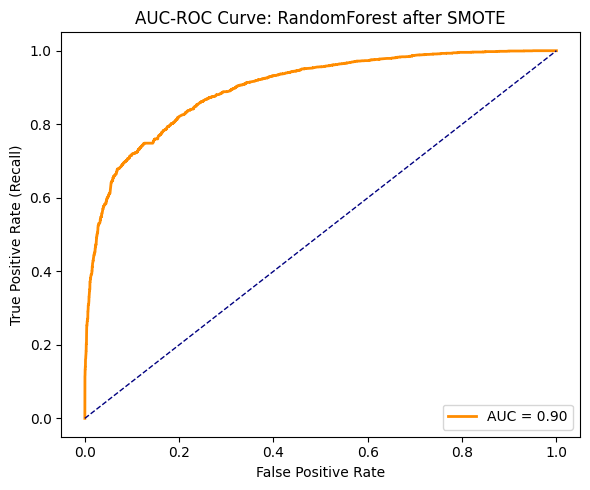

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# y_test: true labels
# y_proba: predicted probabilities for class 1 (already computed in your code)

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('AUC-ROC Curve: RandomForest after SMOTE')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

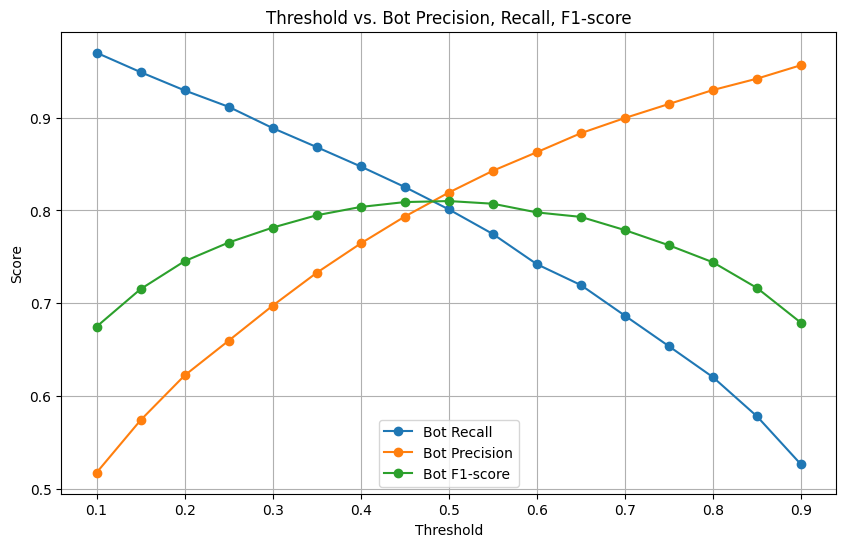

Results for threshold = 0.30
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      5003
           1       0.69      0.89      0.78      2485

    accuracy                           0.83      7488
   macro avg       0.82      0.85      0.82      7488
weighted avg       0.86      0.83      0.84      7488



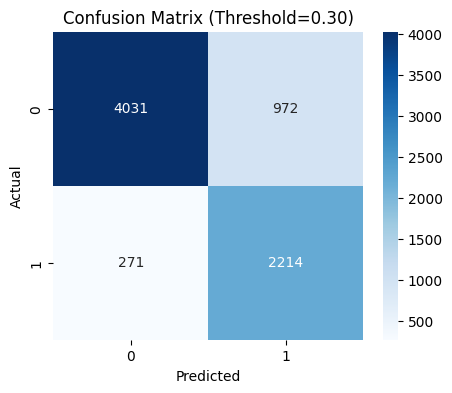

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

# Predict probabilities for the positive class (bot)
y_proba = rf.predict_proba(X_test)[:, 1]

# Try multiple thresholds
thresholds = np.arange(0.1, 0.91, 0.05)
recalls = []
precisions = []
f1s = []

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    report = classification_report(y_test, y_pred_thresh, output_dict=True)
    recalls.append(report['1']['recall'])
    precisions.append(report['1']['precision'])
    f1s.append(report['1']['f1-score'])

# Plot precision-recall-threshold curve for bots
plt.figure(figsize=(10,6))
plt.plot(thresholds, recalls, label='Bot Recall', marker='o')
plt.plot(thresholds, precisions, label='Bot Precision', marker='o')
plt.plot(thresholds, f1s, label='Bot F1-score', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold vs. Bot Precision, Recall, F1-score')
plt.legend()
plt.grid(True)
plt.show()

# Choose a threshold (e.g., 0.3 for even higher recall)
chosen_threshold = 0.3
y_pred_new = (y_proba >= chosen_threshold).astype(int)

# Print new classification report and confusion matrix
print(f"Results for threshold = {chosen_threshold:.2f}")
print(classification_report(y_test, y_pred_new))

cm = confusion_matrix(y_test, y_pred_new)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Threshold={chosen_threshold:.2f})')
plt.show()

In [ ]:
# prompt: print new column called friends_to_follower_ratio using columns friends_count divided by followers_count

df['friends_to_follower_ratio'] = df['friends_count'] / df['followers_count']
print(df[['friends_count', 'followers_count', 'friends_to_follower_ratio']].head())

   friends_count  followers_count  friends_to_follower_ratio
0            168              102                   1.647059
1            128               60                   2.133333
2            449              599                   0.749583
3            334              116                   2.879310
4             18            74448                   0.000242


In [ ]:
# prompt: print types of each column

df.dtypes

,0
created_at,object
default_profile,bool
default_profile_image,bool
favourites_count,int64
followers_count,int64
friends_count,int64
statuses_count,int64
verified,bool
average_tweets_per_day,float64
account_age_days,int64


In [ ]:
# prompt: print new column called statuses_count_per_day using columns statuses_count divided by account_age_days

import pandas as pd
df['account_age_days'] = (pd.to_datetime('now', utc=True) - pd.to_datetime(df['created_at'], utc=True)).dt.days

# Calculate statuses_count_per_day
df['statuses_count_per_day'] = df['statuses_count'] / df['account_age_days']

# Handle potential division by zero if account_age_days is 0
df['statuses_count_per_day'] = df['statuses_count_per_day'].replace([float('inf'), -float('inf')], 0).fillna(0)

print(df[['statuses_count', 'account_age_days', 'statuses_count_per_day']].head())


   statuses_count  account_age_days  statuses_count_per_day
0            3974              5819                0.682935
1             259              5622                0.046069
2           13627              4849                2.810270
3            4432              5761                0.769311
4           15870              5612                2.827869


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif, chi2
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load dataset
#df = pd.read_csv('your_dataset.csv')

# List of feature columns and target
features = ['created_at', 'default_profile', 'default_profile_image', 'favourites_count',
            'followers_count', 'friends_count', 'statuses_count', 'verified',
            'average_tweets_per_day', 'account_age_days']
target = 'account_type'

# Encode categorical features and target as needed
for col in features:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))
df[target] = LabelEncoder().fit_transform(df[target].astype(str))

X = df[features]
y = df[target]

# Scale numerical features for chi2
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Attribute Ranking

# 1. Information Gain (Mutual Information)
mi = mutual_info_classif(X, y, random_state=42)

# 2. Symmetrical Uncertainty
def symmetrical_uncertainty(X, y):
    hx = np.array([mutual_info_classif(X[[col]], y, discrete_features=True, random_state=42)[0] for col in X.columns])
    #hy = mutual_info_classif(y.reshape(-1,1), y, discrete_features=True, random_state=42)[0]
    hy = mutual_info_classif(y.to_numpy().reshape(-1,1), y, discrete_features=True, random_state=42)[0]
    ig = mi
    return 2.0 * ig / (hx + hy + 1e-9)

su = symmetrical_uncertainty(X, y)

# 3. Chi-square
chi2_scores, chi2_p = chi2(X_scaled, y)

# Print ranking
print("\nAttribute Ranking:")
print("Feature\t\tInfoGain\tSymmUnc\t\tChi2")
for i, col in enumerate(features):
    print(f"{col:20s} {mi[i]:.4f}\t\t{su[i]:.4f}\t\t{chi2_scores[i]:.4f}")

# Attribute Selection: Gain Ratio (custom, as not in sklearn)

def entropy(y):
    """Compute entropy of array y"""
    _, counts = np.unique(y, return_counts=True)
    probs = counts / counts.sum()
    return -np.sum(probs * np.log2(probs + 1e-9))

def gain_ratio(X, y):
    base_entropy = entropy(y)
    gr_scores = []
    for col in X.columns:
        x = X[col]
        # For continuous, bin into quartiles
        if len(np.unique(x)) > 10:
            #x = pd.qcut(x, 4, duplicates='drop').codes
            x = pd.qcut(x, 4, duplicates='drop').cat.codes
        else:
            x = x
        # Info gain
        values, counts = np.unique(x, return_counts=True)
        cond_entropy = 0.0
        split_info = 0.0
        for v, c in zip(values, counts):
            y_sub = y[x == v]
            prob = c / len(x)
            cond_entropy += prob * entropy(y_sub)
            split_info -= prob * np.log2(prob + 1e-9)
        info_gain = base_entropy - cond_entropy
        gain_ratio = info_gain / (split_info + 1e-9)
        gr_scores.append(gain_ratio)
    return np.array(gr_scores)

gr = gain_ratio(X, y)

print("\nGain Ratio Feature Evaluator:")
print("Feature\t\tGainRatio")
for i, col in enumerate(features):
    print(f"{col:20s} {gr[i]:.4f}")

# Optionally, select top N features
top_n = 5
indices = np.argsort(gr)[::-1][:top_n]
print(f"\nTop {top_n} features by Gain Ratio:")
for idx in indices:
    print(f"{features[idx]} (Gain Ratio: {gr[idx]:.4f})")


Attribute Ranking:
Feature		InfoGain	SymmUnc		Chi2
created_at           0.0642		0.1010		330.2253
default_profile      0.0423		0.1247		1827.3651
default_profile_image 0.0062		0.0193		316.2457
favourites_count     0.1069		0.2389		104.4133
followers_count      0.1702		0.3675		36.3707
friends_count        0.1202		0.2901		0.2217
statuses_count       0.1022		0.2073		0.1981
verified             0.0578		0.1660		2864.5951
average_tweets_per_day 0.0850		0.1911		0.2765
account_age_days     0.0611		0.1612		145.5872

Gain Ratio Feature Evaluator:
Feature		GainRatio
created_at           0.0206
default_profile      0.0618
default_profile_image 0.0511
favourites_count     0.0446
followers_count      0.1061
friends_count        0.0787
statuses_count       0.0429
verified             0.1224
average_tweets_per_day 0.0324
account_age_days     0.0206

Top 5 features by Gain Ratio:
verified (Gain Ratio: 0.1224)
followers_count (Gain Ratio: 0.1061)
friends_count (Gain Ratio: 0.0787)
default_profile (Gain Ra

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
